In [8]:
import pandas as pd
import plotly.graph_objects as go

%matplotlib inline

In [9]:
# Load the CSV file
price_data = pd.read_csv("data/prices.csv", index_col=0)

# Convert index to integer (years)
price_data.index = price_data.index.astype(int)

# Create the interactive Plotly figure
fig = go.Figure()

for country in price_data.columns:
    fig.add_trace(go.Scatter(
        x=price_data.index,
        y=price_data[country],
        mode='lines+markers',
        name=country
    ))

fig.update_layout(
    title='Price Comparison Across Countries (2010–2020)',
    xaxis_title='Year',
    yaxis_title='Price (USD per unit)',
    width=1000,
    height=600,
    legend_title='Country',
    hovermode='x unified'
)

fig.show()


In [10]:
# Load your CSV file (adjust path as needed)
export_data = pd.read_csv("data/AllYears_Exports.csv")

def create_interactive_export_plot(destination_label, title_suffix):
    # Filter for specific destination
    filtered = export_data[export_data['row_label'].str.endswith(destination_label)].copy()
    filtered['country'] = filtered['row_label'].str.replace(destination_label, '', regex=False)
    filtered.drop(columns='row_label', inplace=True)

    # Reshape
    melted = filtered.melt(id_vars='country', var_name='month', value_name='export_value')
    melted['month'] = pd.to_datetime(melted['month'], format='%Y%m')

    # Plot
    fig = go.Figure()
    for country in melted['country'].unique():
        country_data = melted[melted['country'] == country]
        fig.add_trace(go.Scatter(
            x=country_data['month'],
            y=country_data['export_value'],
            mode='lines+markers',
            name=country
        ))

    fig.update_layout(
        title=f'Monthly Exports {title_suffix} (Photovoltaic Electronics)',
        xaxis_title='Date',
        yaxis_title='Export Value (USD)',
        width=1000,
        height=600,
        legend_title='Country',
        hovermode='x unified'
    )

    fig.show()

# Call the functions
create_interactive_export_plot('_to_USA', 'to the USA')
create_interactive_export_plot('_to_W00', 'to the World')


In [11]:
export_data = pd.read_csv("data/AllYears_Exports.csv")

destination_label = "_to_USA"

filtered = export_data[export_data['row_label'].str.endswith(destination_label)].copy()
filtered['country'] = filtered['row_label'].str.replace(destination_label, '', regex=False)
filtered.drop(columns='row_label', inplace=True)

# Reshape
melted = filtered.melt(id_vars='country', var_name='month', value_name='export_value')
melted['month'] = pd.to_datetime(melted['month'], format='%Y%m')

melted.to_csv("data/Country_to_USA.csv")
# Load the data
df = pd.read_csv('data/Country_to_USA.csv')  # Replace with your correct path if needed

# Define region mappings
region_map = {
    'Europe': ['France', 'Germany', 'Italy', 'Netherlands'],
    'SoutheastAsia': ['Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
    'JP+KR': ['Japan', 'Korea, Republic of'],
    'China': ['China', 'China, Hong Kong SAR']
}

# Assign regions to countries
df['region'] = None
for region, countries in region_map.items():
    df.loc[df['country'].isin(countries), 'region'] = region

# Filter to keep only rows with assigned regions
df_filtered = df[df['region'].notnull()]

# Group by region and month and sum the export values
df_grouped = df_filtered.groupby(['region', 'month'], as_index=False)['export_value'].sum()

# Save to CSV
df_grouped.to_csv('data/Regions_to_USA.csv', index=False)

In [12]:
export_data = pd.read_csv("data/AllYears_Exports.csv")

destination_label = "_to_W00"

filtered = export_data[export_data['row_label'].str.endswith(destination_label)].copy()
filtered['country'] = filtered['row_label'].str.replace(destination_label, '', regex=False)
filtered.drop(columns='row_label', inplace=True)

# Reshape
melted = filtered.melt(id_vars='country', var_name='month', value_name='export_value')
melted['month'] = pd.to_datetime(melted['month'], format='%Y%m')

melted.to_csv("data/Country_to_W00.csv")

# Load the data
df = pd.read_csv('data/playeble_world.csv')  # Replace with your correct path if needed

# Define region mappings
region_map = {
    'Europe': ['France', 'Germany', 'Italy', 'Netherlands'],
    'SoutheastAsia': ['Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
    'JP+KR': ['Japan', 'Korea, Republic of'],
    'China': ['China', 'China, Hong Kong SAR']
}

# Assign regions to countries
df['region'] = None
for region, countries in region_map.items():
    df.loc[df['country'].isin(countries), 'region'] = region

# Filter to keep only rows with assigned regions
df_filtered = df[df['region'].notnull()]

# Group by region and month and sum the export values
df_grouped = df_filtered.groupby(['region', 'month'], as_index=False)['export_value'].sum()

# Save to CSV
df_grouped.to_csv('data/Regions_to_W00.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/playeble_world.csv'

In [ ]:
price_data = pd.read_csv("data/prices.csv", index_col=0)

In [ ]:
value_data = pd.read_csv('data/Country_to_USA.csv')
# Convert month to datetime once
value_data["month"] = pd.to_datetime(value_data["month"])

In [ ]:
# Filter by country
China = value_data[value_data["country"] == "China"].copy()
HK = value_data[value_data["country"] == "China, Hong Kong SAR"].copy()

# Initialize dictionaries
china_prices = {}

# Loop over years
for year in range(2010, 2021):
    china_year = China[China["month"].dt.year == year]["export_value"].sum()
    hk_year = HK[HK["month"].dt.year == year]["export_value"].sum()

    # Compute price-weighted average
    china_prices[year] = (
        china_year * price_data["China"][year] + 
        hk_year * price_data["Hong Kong"][year]
    ) / (china_year + hk_year)

In [ ]:
# Filter by country
France = value_data[value_data["country"] == "France"].copy()
Germany = value_data[value_data["country"] == "Germany"].copy()
Italy = value_data[value_data["country"] == "Italy"].copy()
Netherlands = value_data[value_data["country"] == "Netherlands"].copy()

# Initialize dictionaries
EU_prices = {}

# Loop over years
for year in range(2010, 2021):
    France_year = France[France["month"].dt.year == year]["export_value"].sum()
    Germany_year = Germany[Germany["month"].dt.year == year]["export_value"].sum()
    Italy_year = Italy[Italy["month"].dt.year == year]["export_value"].sum()
    Netherlands_year = Netherlands[Netherlands["month"].dt.year == year]["export_value"].sum()

    # Compute price-weighted average
    EU_prices[year] = (
        France_year * price_data["France"][year] + 
        Germany_year * price_data["Germany"][year] +
        Italy_year * price_data["Italy"][year] +
        Netherlands_year * price_data["Netherlands"][year]
    ) / (France_year + Germany_year + Italy_year + Netherlands_year)

In [ ]:
# Filter by country
Malaysia = value_data[value_data["country"] == "Malaysia"].copy()
Philippine = value_data[value_data["country"] == "Philippine"].copy()
Singapore = value_data[value_data["country"] == "Singapore"].copy()
Thailand = value_data[value_data["country"] == "Thailand"].copy()
Vietnam = value_data[value_data["country"] == "Vietnam"].copy()

# Initialize dictionaries
SEA_prices = {}

# Loop over years
for year in range(2010, 2021):
    Malaysia_year = Malaysia[Malaysia["month"].dt.year == year]["export_value"].sum()
    Philippine_year = Philippine[Philippine["month"].dt.year == year]["export_value"].sum()
    Singapore_year = Singapore[Singapore["month"].dt.year == year]["export_value"].sum()
    Thailand_year = Thailand[Thailand["month"].dt.year == year]["export_value"].sum()
    Vietnam_year = Vietnam[Vietnam["month"].dt.year == year]["export_value"].sum()

    # Compute price-weighted average
    SEA_prices[year] = (
        Malaysia_year * price_data["Malaysia"][year] + 
        Philippine_year * price_data["Philippines"][year] +
        Singapore_year * price_data["Singapore"][year] +
        Thailand_year * price_data["Thailand"][year] +
        Vietnam_year * price_data["Vietnam"][year]
    ) / (Malaysia_year + Philippine_year + Singapore_year + Thailand_year + Vietnam_year)

In [ ]:
# Convert month to datetime once
value_data["month"] = pd.to_datetime(value_data["month"])

# Filter by country
Japan = value_data[value_data["country"] == "Japan"].copy()
Korea = value_data[value_data["country"] == "Rep. of Korea"].copy()

# Initialize dictionaries
JPK_prices = {}

# Loop over years
for year in range(2010, 2021):
    Japan_year = Japan[Japan["month"].dt.year == year]["export_value"].sum()
    Korea_year = Korea[Korea["month"].dt.year == year]["export_value"].sum()

    # Compute price-weighted average
    JPK_prices[year] = (
        Japan_year * price_data["Japan"][year] + 
        Korea_year * price_data["Korea"][year]
    ) / (Japan_year + Korea_year)

In [ ]:
prices_df = pd.DataFrame({
    'EU': EU_prices,
    'China': china_prices,
    'SouthEast Asia': SEA_prices,
    'Japan + Korea': JPK_prices
})
prices_df.index = range(2010, 2021)

# Save to CSV
prices_df.to_csv("data/Region_prices.csv", index=True)

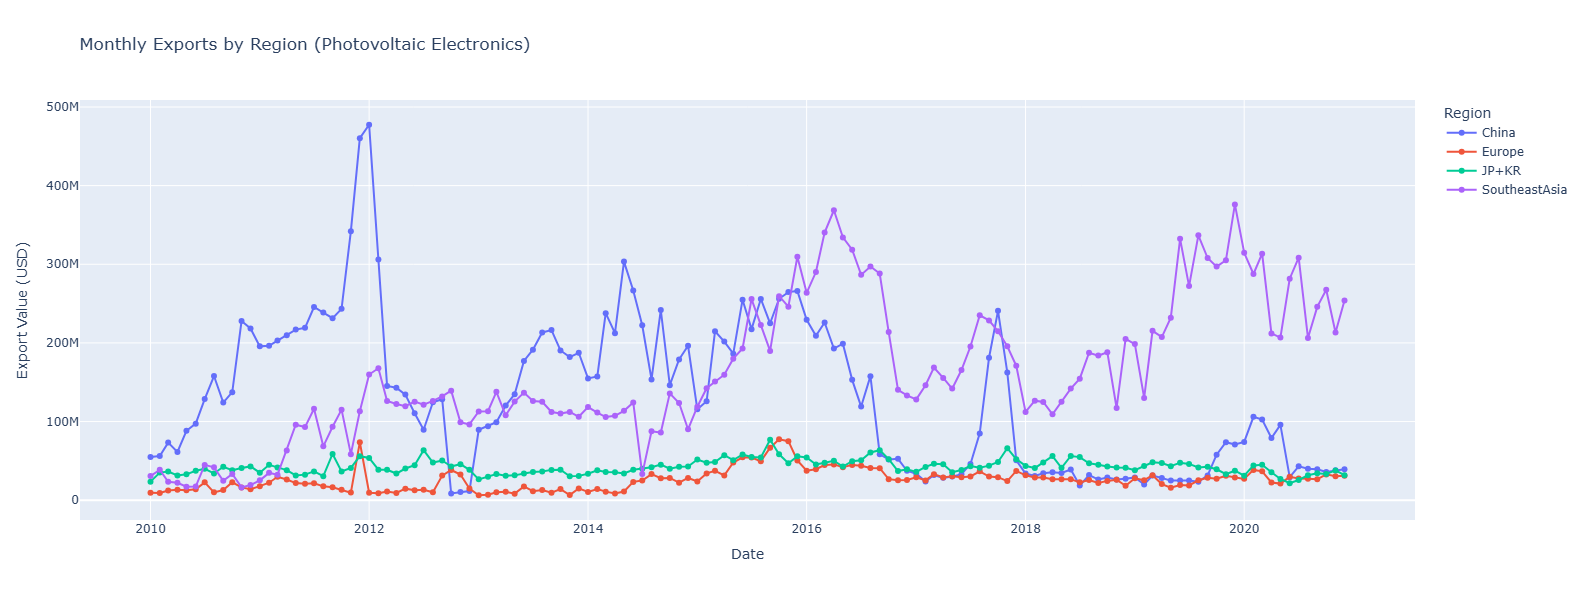

In [ ]:
# Load the region-based export data
export_data = pd.read_csv("data/Regions_to_USA.csv")

# Convert month to datetime if it's not already
export_data['month'] = pd.to_datetime(export_data['month'])

# Function to plot regional export data
def plot_regional_exports(title_suffix='(Photovoltaic Electronics)'):
    fig = go.Figure()

    for region in export_data['region'].unique():
        region_data = export_data[export_data['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['month'],
            y=region_data['export_value'],
            mode='lines+markers',
            name=region
        ))

    fig.update_layout(
        title=f'Monthly Exports by Region to USA {title_suffix}',
        xaxis_title='Date',
        yaxis_title='Export Value (USD)',
        width=1000,
        height=600,
        legend_title='Region',
        hovermode='x unified'
    )

    fig.show()

# Call the function
plot_regional_exports()


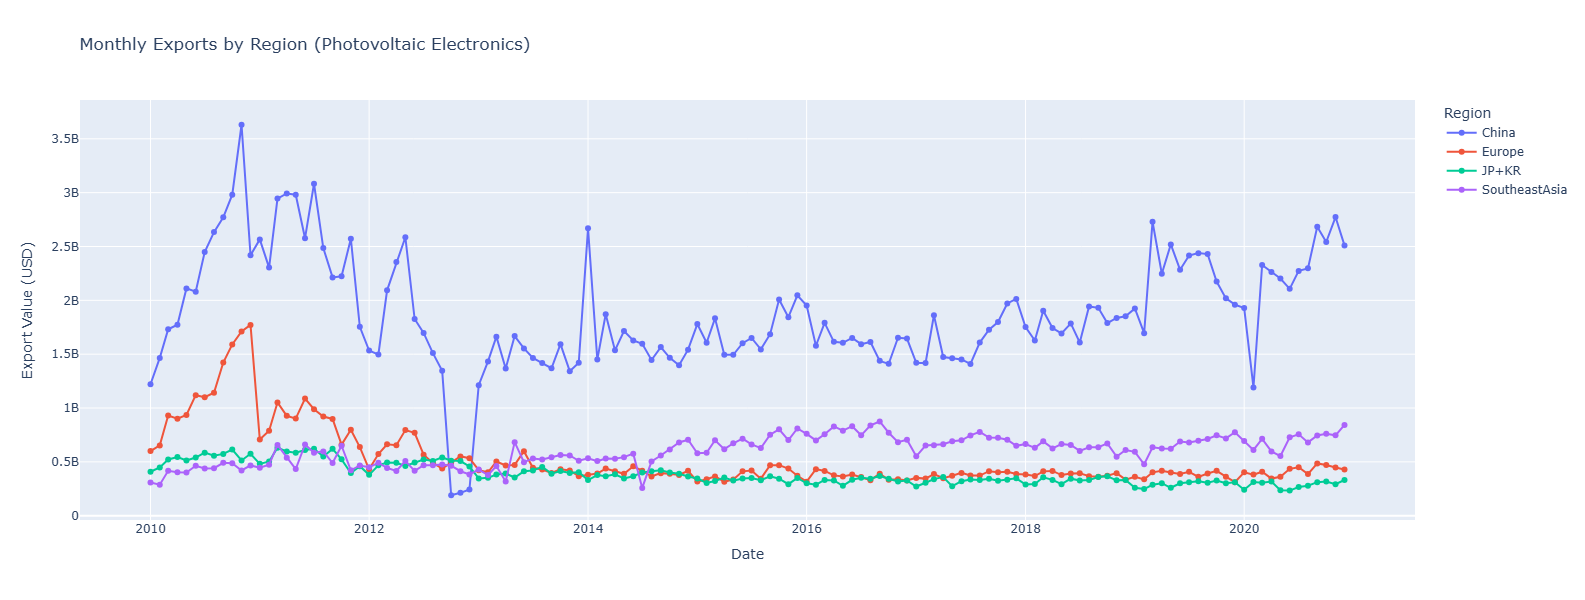

In [ ]:
# Load the region-based export data
export_data = pd.read_csv("data/Regions_to_W00.csv")

# Convert month to datetime if it's not already
export_data['month'] = pd.to_datetime(export_data['month'])

# Function to plot regional export data
def plot_regional_exports(title_suffix='(Photovoltaic Electronics)'):
    fig = go.Figure()

    for region in export_data['region'].unique():
        region_data = export_data[export_data['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['month'],
            y=region_data['export_value'],
            mode='lines+markers',
            name=region
        ))

    fig.update_layout(
        title=f'Monthly Global Exports by Region {title_suffix}',
        xaxis_title='Date',
        yaxis_title='Export Value (USD)',
        width=1000,
        height=600,
        legend_title='Region',
        hovermode='x unified'
    )

    fig.show()

# Call the function
plot_regional_exports()


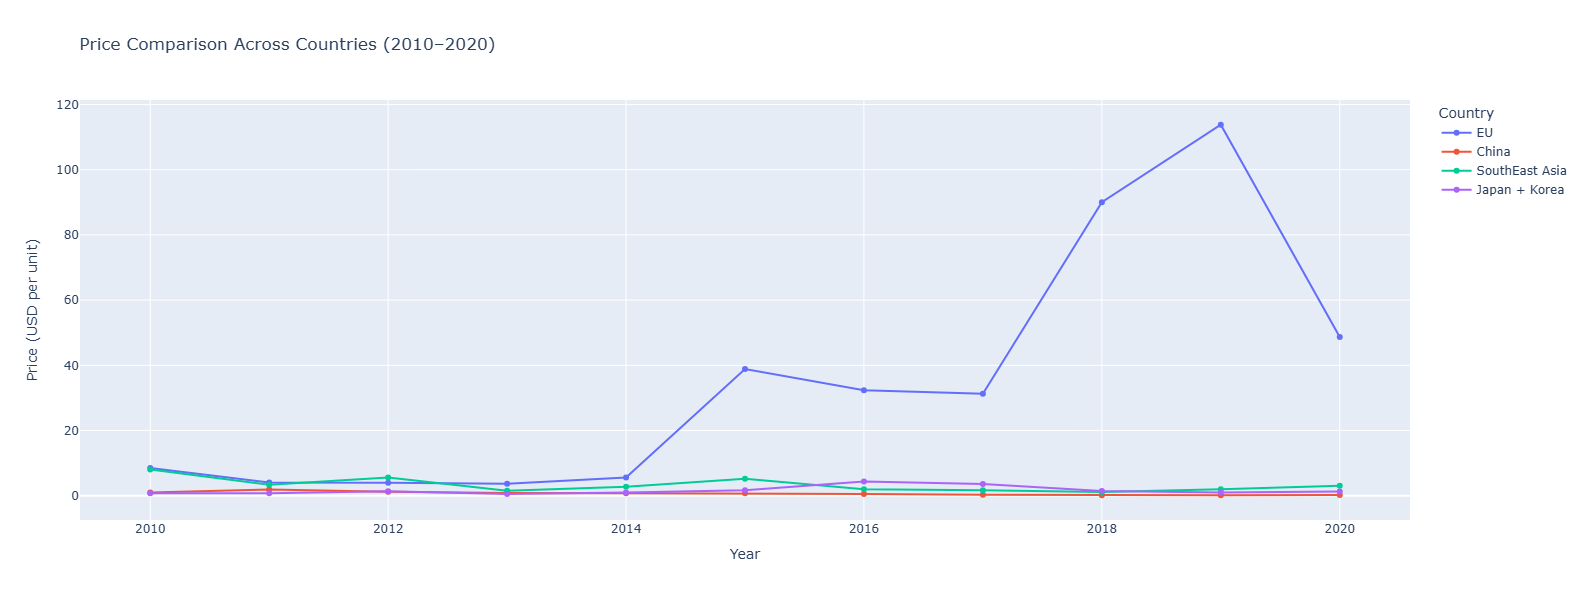

In [ ]:
# Load the CSV file
price_data = pd.read_csv("data/Region_prices.csv", index_col=0)

# Convert index to integer (years)
price_data.index = price_data.index.astype(int)

# Create the interactive Plotly figure
fig = go.Figure()

for country in price_data.columns:
    fig.add_trace(go.Scatter(
        x=price_data.index,
        y=price_data[country],
        mode='lines+markers',
        name=country
    ))

fig.update_layout(
    title='Price Comparison Across Countries (2010–2020)',
    xaxis_title='Year',
    yaxis_title='Price (USD per unit)',
    width=1000,
    height=600,
    legend_title='Country',
    hovermode='x unified'
)

fig.show()